# Trabalho Prático - Algoritmos II
#### João Antonio Oliveira Pedrosa - 2019006752

## Classe Point

Construtor:
`Point(x, y)` cria um ponto ao receber suas coordendas

Impressão:
`__str__` função para determinar qual à representação em forma de string dessa estrutura. Utilizada para permitir uma chamada de `print(Ponto)`.

#### Sobrecarregando operadores:
`+` soma os pontos, coordenada por coordenada.

`-` substrai os pontos, coordenada por coordenada.

`*` produto vetorial dos dois vetores representados pelos pontos.

## Funções com Pontos

`counter_clock(p1, p2, p3)` retorna se os três pontos, na ordem recebida, estão em sentido anti-horário.

`in_triangle(p, p1, p2, p3)` retorna se o ponto $p$ pertence ao triângulo $p_1 p_2 p_3$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Point:
    def __init__(self, x = 0, y = 0):
        self.x = x
        self.y = y
        
    def __str__(self):
        return "Ponto({0}, {1})".format(self.x, self.y)
    
    def __add__(p1, p2):
        return Point(p1.x + p2.x, p1.y + p2.y)
    
    def __sub__(p1, p2):
        return Point(p1.x - p2.x, p1.y - p2.y)
    
    def __mul__(p1, p2):
        return p1.x * p2.y - p1.y * p2.x
    
def counter_clock(p1, p2, p3):
    return (p1 - p2) * (p1 - p3) > 0

def in_triangle(p, p1, p2, p3):
    # Se (p1, p2, p3) não é anti horário, certamente (p1, p3, p2) é!
    if not counter_clock(p1, p2, p3):
        p2, p3 = p3, p2
    return (counter_clock(p1, p2, p) and counter_clock(p2, p3, p) and counter_clock(p3, p1, p))

### Teste Aleatório para a classe Ponto:

Quantos pontos estão dentro do triângulo? 2



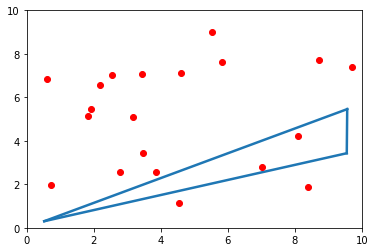

In [3]:
a = Point(np.random.random_sample() * 10, np.random.random_sample() * 10)
b = Point(np.random.random_sample() * 10, np.random.random_sample() * 10)
c = Point(np.random.random_sample() * 10, np.random.random_sample() * 10)

points = [Point(np.random.random_sample() * 10, np.random.random_sample() * 10) for i in range(20)]

print("Quantos pontos estão dentro do triângulo?",(sum([1 if in_triangle(p, b, c, a) else 0 for p in points])))
print()

plt.axes()
line = plt.Line2D((a.x, b.x), (a.y, b.y), lw = 2.5)
plt.gca().add_line(line)
line = plt.Line2D((b.x, c.x), (b.y, c.y), lw = 2.5)
plt.gca().add_line(line)
line = plt.Line2D((c.x, a.x), (c.y, a.y), lw = 2.5)
plt.gca().add_line(line)
plt.plot([p.x for p in points], [p.y for p in points], 'ro')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

### Classe Polygon

Construtor: `Polygon(pontos)` recebe uma lista de pontos em sentido anti-horário. (Assume que esses pontos formarão um polígono simples).

`copy()` Retorna uma cópia do Polígono.

`pop(int i)` Remove o ponto de índice $i$ do Polígono.

`plot()` Imprime um gráfico do MatPlotLib com o Polígono.

`ear_clip()` Retorna uma Lista de Triplas: A lista dos triângulos que compõem o polígono.

In [4]:
class Polygon:
    def __init__(self, points):
        self.points = points.copy()
            
    def copy(self):
        return Polygon(self.points.copy())
    
    def pop(i):
        self.points.pop(i)
    
    def plot(self):
        px = [p.x for p in self.points]
        px.append(self.points[0].x)
        py = [p.y for p in self.points]
        py.append(self.points[0].y)
        plt.plot(px, py, 'p-')
    
    def ear_clip(self):
        pol = self.copy()
        tri = []
        while(len(pol.points) > 3):
            for i in range(0, len(pol.points) - 1):
                a, b, c = [pol.points[j] for j in range(i-1, i+2)]
                # Checando Adjacência
                if not counter_clock(a, b, c): continue
                # Checando se existe vértice dentro do Triângulo (A, B, C)
                skip = False
                for p in pol.points:
                    if((p == a or p == b or p == c)): continue
                    if(in_triangle(p, a, b, c)):
                        skip = True
                        break
                if(skip): continue
                
                # Tudo okay, podemos adicionar o triângulo e excluir o ponto
                tri.append([a, b, c])
                pol.points.pop(i)
                break
        tri.append(pol.points)
        return tri

Por fim, uma pequena função auxiliar para ajudar na visualização do Ear Clip

In [5]:
# Essa função auxiliar recebe uma lista de Triângulos e plot uma animação deles, na ordem dada
import time
def animate(triangles):
    from IPython.display import clear_output
    import time
    
    xlim = (min([min([a.x for a in t]) for t in triangles]) - 1, max([max([a.x for a in t]) for t in triangles]) + 1)
    ylim = (min([min([a.y for a in t]) for t in triangles]) - 1, max([max([a.y for a in t]) for t in triangles]) + 1)
    
    for stop in range(len(triangles) + 1):
        c = 0
        lines = set()
        plt.axes()
        for t in triangles:
            for i in range(len(t)):
                a = t[i]
                b = t[(i+1) % len(t)]
                line = plt.Line2D((a.x, b.x), (a.y, b.y), lw = 1.5)
                if line not in lines:
                    plt.gca().add_line(line)
                    lines.add(line)
            c += 1
            if(c >= stop):
                break
        plt.xlim(xlim)
        plt.ylim(ylim)
        plt.show()
        clear_output(wait = True)
        time.sleep(0.15)

## Testes e Visualização

### Polígono 1

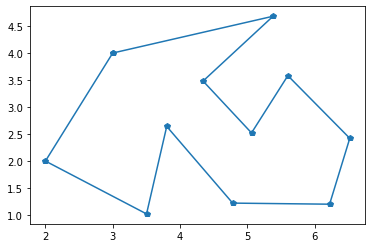

In [6]:
points = [(3,4), 
(2,2), 
(3.5025,1.02125), 
(3.8025,2.64125), 
(4.7825,1.22125), 
(6.2225,1.20125), 
(6.5225,2.42125), 
(5.6025,3.58125), 
(5.0625,2.52125), 
(4.3425,3.48125), 
(5.3825,4.68125)]
points = [Point(p[0], p[1]) for p in points]

# Criando o Polígono e imprimindo
P1 = Polygon(points)
P1.plot()

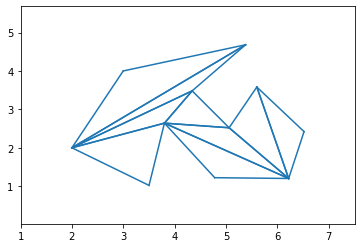

In [7]:
tri = P1.ear_clip()
animate(tri)

### Polígono 2

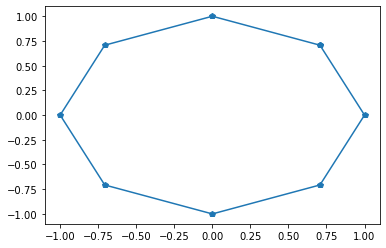

In [8]:
points = [(np.cos((2*k*np.pi)/8),np.sin((2*k*np.pi)/8)) for k in range(1,9)]
points = [Point(p[0], p[1]) for p in points]

# Criando o Polígono e imprimindo
P2 = Polygon(points)
P2.plot()

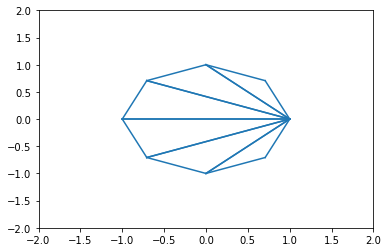

In [9]:
tri = P2.ear_clip()
animate(tri)

### Polígono 3

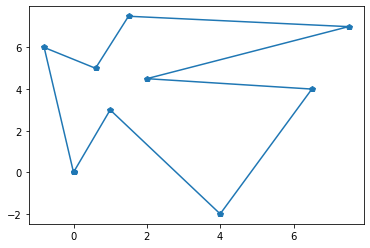

In [10]:
points = [(0,0), (1,3), (4,-2),(6.5,4),(2,4.5),(7.5,7),(1.5,7.5),(0.6,5),(-0.8,6),(0,0)]
points = [Point(p[0], p[1]) for p in points]

# Criando o Polígono e imprimindo
P3 = Polygon(points)
P3.plot()

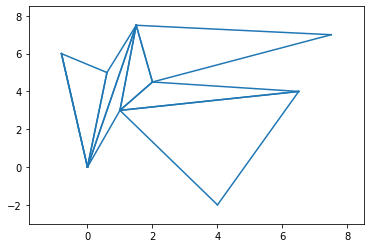

In [11]:
tri = P3.ear_clip()
animate(tri)

### Polígono 4

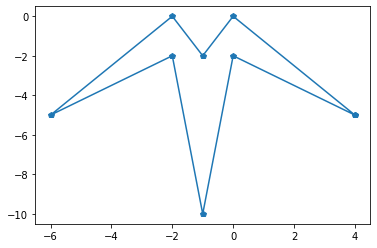

In [12]:
points = [(4, -5), (0, 0), (-1, -2), (-2, 0), (-6, -5), (-2, -2), (-1, -10), (0, -2)]
points = [Point(p[0], p[1]) for p in points]

P4 = Polygon(points)
P4.plot()

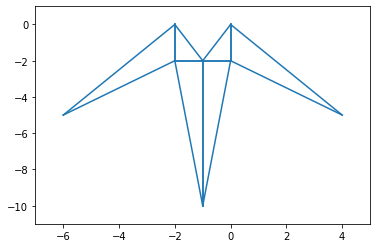

In [13]:
tri = P4.ear_clip()
animate(tri)